In [128]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# データの整理
- GDPデータ、金利（短長）、税データがある
- 税データのみ年次データであるので四半期に合わせるために調整したいので後に整理する
- まずはGDPデータ、金利（短長）を整理する
## GDPデータを統合

- GDPデータは1980-1995Q1と1994Q1-2025年の2つのデータがあり、若干データにズレがある
- 1994Q1-1995Q1のデータに被りがあるが、そこが合致しない。この理由は実質データであるため基準年がそれぞれ2015年と2020年としてあり異なっている
- ここで、2020基準に全データを統一させるため、被りがある5期分のデータで「2020年基準の合計/2015年基準の合計」を2020年基準修正係数として、2015年基準のデータに積を取るb

In [129]:
df = pd.read_csv("gdp_data_251214.csv", thousands=",")

df.head()

,date,def_2015,def_2020,gdp_2015,gdp_2020,cons_2015,cons_2020,民間住宅_15,民間住宅_20,民間企業設備_15,民間企業設備_20,政府最終消費支出_15,政府最終消費支出_20,公的固定資本形成_15,公的固定資本形成_20
0,1980-01-01,91.2,NaN,269747.5,NaN,153290.7,NaN,26716.2,NaN,38097.5,NaN,44078.7,NaN,29252.6,NaN
1,1980-04-01,93.4,NaN,268521.8,NaN,153551.9,NaN,26367.9,NaN,38403.6,NaN,44442.9,NaN,27925.8,NaN
2,1980-07-01,94.4,NaN,274183.1,NaN,155580.0,NaN,25824.5,NaN,38223.4,NaN,44895.0,NaN,28018.6,NaN
3,1980-10-01,95.4,NaN,279601.8,NaN,156162.4,NaN,25285.0,NaN,39227.7,NaN,45386.4,NaN,29858.2,NaN
4,1981-01-01,95.6,NaN,281995.7,NaN,156757.7,NaN,25392.5,NaN,39542.0,NaN,46006.4,NaN,30329.8,NaN


In [130]:
# 投資、政府支出に必要なデータを計算

df["inv_2015"] = df.民間住宅_15 + df.民間企業設備_15
df["inv_2020"] = df.民間住宅_20 + df.民間企業設備_20
df["gov_2015"] = df.政府最終消費支出_15 + df.公的固定資本形成_15
df["gov_2020"] = df.政府最終消費支出_20 + df.公的固定資本形成_20

In [131]:
# 被りデータの平均で基準を2020年基準データに合わせる

df["date"] = df_origin["date"]
def union(df, old, new, name):

    overlap = df[[old, new]].dropna()
    raitio = overlap[new].mean()/overlap[old].mean()
    df[name] = df[new].fillna(df[old]*raitio)
union(df, "def_2015", "def_2020", "gdp_def")
union(df, "gdp_2015", "gdp_2020", "gdp")
union(df, "cons_2015", "cons_2020", "cons")
union(df, "inv_2015", "inv_2020", "inv")
union(df, "gov_2015", "gov_2020", "gov")
df.head()


,date,def_2015,def_2020,gdp_2015,gdp_2020,cons_2015,cons_2020,民間住宅_15,民間住宅_20,民間企業設備_15,...,公的固定資本形成_20,inv_2015,inv_2020,gov_2015,gov_2020,gdp_def,gdp,cons,inv,gov
0,1980-01-01,91.2,NaN,269747.5,NaN,153290.7,NaN,26716.2,NaN,38097.5,...,NaN,64813.7,NaN,73331.3,NaN,89.540658,280315.318775,156236.467458,72537.651350,72906.708609
1,1980-04-01,93.4,NaN,268521.8,NaN,153551.9,NaN,26367.9,NaN,38403.6,...,NaN,64771.5,NaN,72368.7,NaN,91.700630,279041.599885,156502.686905,72490.422309,71949.682105
2,1980-07-01,94.4,NaN,274183.1,NaN,155580.0,NaN,25824.5,NaN,38223.4,...,NaN,64047.9,NaN,72913.6,NaN,92.682435,284924.690977,158569.760639,71680.589750,72491.427110
3,1980-10-01,95.4,NaN,279601.8,NaN,156162.4,NaN,25285.0,NaN,39227.7,...,NaN,64512.7,NaN,75244.6,NaN,93.664241,290555.677799,159163.352544,72200.780702,74808.930520
4,1981-01-01,95.6,NaN,281995.7,NaN,156757.7,NaN,25392.5,NaN,39542.0,...,NaN,64934.5,NaN,76336.2,NaN,93.860602,293043.362918,159770.092347,72672.847277,75894.210109


## 金利データの調整
### 長期金利データ
- 長期金利データは日時データであるため、それを四半期データに調整
- S61.12.1のようなデータなので、先頭の文字と"."で区切り、日時データに変換

In [ ]:
# データの読み込み
df1 = pd.read_csv("longrate_data_251214.csv")
df1

In [182]:
# 関数はAIに書いてもらう
df1 = pd.read_csv("longrate_data_251214.csv")

def parse_japanese_date(date_str):
    """
    'S61.12.1' のような文字列を西暦のdatetime型に変換する関数
    対応: S(昭和), H(平成), R(令和)
    """
    if pd.isna(date_str):
        return None
    
    # 1文字目(元号)とそれ以降(年月日)に分ける
    # 例: 'S61.12.1' -> letter='S', rest='61.12.1'
    letter = date_str[0]
    try:
        parts = date_str[1:].split('.')
        year = int(parts[0])
        month = int(parts[1])
        # 日がない場合('S61.12')は1日とする
        day = int(parts[2]) if len(parts) > 2 else 1
    except:
        return None # エラー時はNoneを返す

    # 西暦への変換オフセット
    if letter == 'S':   # 昭和 (1926年 = 昭和1年 -> 1925 + 年)
        ad_year = 1925 + year
    elif letter == 'H': # 平成 (1989年 = 平成1年 -> 1988 + 年)
        ad_year = 1988 + year
    elif letter == 'R': # 令和 (2019年 = 令和1年 -> 2018 + 年)
        ad_year = 2018 + year
    elif letter == 'T': # 大正 (必要な場合)
        ad_year = 1911 + year
    elif letter == 'M': # 明治 (必要な場合)
        ad_year = 1867 + year
    else:
        # 西暦などで書かれていた場合そのまま返すなどの処理も可能
        return None

    return pd.Timestamp(f"{ad_year}-{month}-{day}")

# 関数の適用とそれを日付データにする
df1["date"] = df1['date'].apply(parse_japanese_date)
df1 = df1.set_index('date')
# 四半期データに書き換え
pd.DataFrame(df1['新発10年国債利回り'].resample('QS').mean()).head()

,新発10年国債利回り
date,
1986-10-01,5.381455
1987-01-01,5.010712
1987-04-01,4.027841
1987-07-01,5.459972
1987-10-01,5.505265


### 短期金利データ
- これは日時データなので、四半期データにする
- parse_datesで時間データにして、set_indexで時間をインデックスにする

In [167]:
df2 = pd.read_csv("shortrate_data_251214.csv", parse_dates=["date"]).set_index("date")
df2
# 四半期データに書き換え
pd.DataFrame(df2['無担保コールレート・Ｏ／Ｎ　月平均／金利'].resample('QS').mean()).head()

,無担保コールレート・Ｏ／Ｎ 月平均／金利
date,
1985-07-01,6.387167
1985-10-01,7.440333
1986-01-01,6.275433
1986-04-01,4.629300
1986-07-01,4.688467
...,...
2024-10-01,0.227000
2025-01-01,0.416000
2025-04-01,0.477000


## ここまでのデータの統合
- これから頻繁に使うので、データフレーム名は"d"にする
- GDP、金利、税のデータを統合

In [179]:
d = pd.DataFrame()
d = df[["date", "gdp_def", "gdp", "cons", "inv", "gov"]].copy()
d = d.set_index('date')
d["long_rate"] = pd.DataFrame(df1['新発10年国債利回り'].resample('QS').mean())
d["short_rate"] = pd.DataFrame(df2['無担保コールレート・Ｏ／Ｎ　月平均／金利'].resample('QS').mean())
d.head()

,gdp_def,gdp,cons,inv,gov,long_rate,short_rate
date,,,,,,,
1980-01-01,89.540658,280315.318775,156236.467458,72537.651350,72906.708609,NaN,NaN
1980-04-01,91.700630,279041.599885,156502.686905,72490.422309,71949.682105,NaN,NaN
1980-07-01,92.682435,284924.690977,158569.760639,71680.589750,72491.427110,NaN,NaN
1980-10-01,93.664241,290555.677799,159163.352544,72200.780702,74808.930520,NaN,NaN
1981-01-01,93.860602,293043.362918,159770.092347,72672.847277,75894.210109,NaN,NaN


Text(0, 0.5, 'Level')

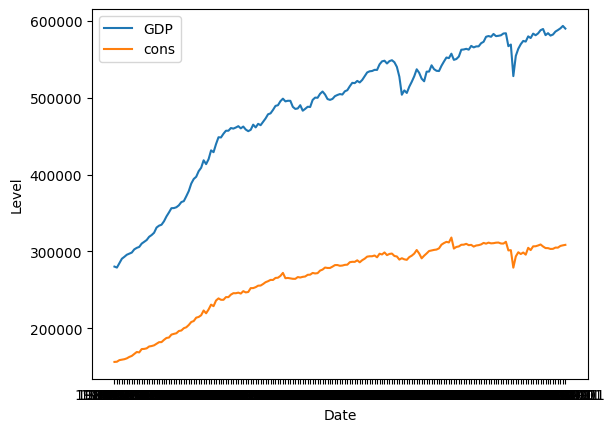

In [169]:
plt.plot(d.index, d["gdp"], label = "GDP")
plt.plot(d.index, d["cons"], label = "cons")
plt.legend()
plt.xlabel("Date")
plt.ylabel("Level")

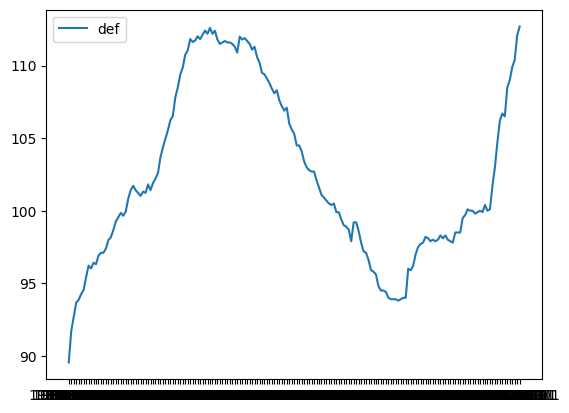

In [171]:
plt.plot(d.index, d["gdp_def"], label = "def")
plt.legend()

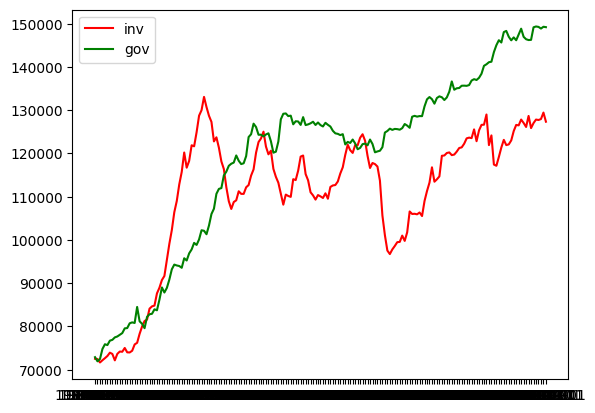

In [174]:
plt.plot(d.index, d["inv"], label="inv", color="red")
plt.plot(d.index, d["gov"], label="gov", color="green")
plt.legend()

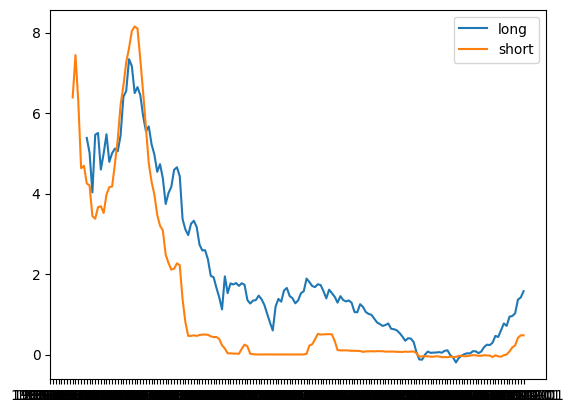

In [176]:
plt.plot(d.index, d["long_rate"], label="long")
plt.plot(d.index, d["short_rate"], label="short")
plt.legend()

## 税データを調整
- 年次データを調整
- まずは実質データに変換する

In [181]:
df3 = pd.read_csv("tax_data_251214.csv", parse_dates=["date"]).set_index("date")
df3.head()

,一般会計税収,所得税収,法人税収,消費税収
date,,,,
1979-01-01,237295,92720,73859,NaN
1980-01-01,268687,107996,89227,NaN
1981-01-01,289521,119804,88225,NaN
1982-01-01,305111,128455,91346,NaN
1983-01-01,323583,136428,98245,NaN


In [183]:
d["gdp_def"]

date
1980-01-01     89.540658
1980-04-01     91.700630
1980-07-01     92.682435
1980-10-01     93.664241
1981-01-01     93.860602
                 ...    
2024-07-01    109.000000
2024-10-01    109.900000
2025-01-01    110.400000
2025-04-01    112.100000
2025-07-01    112.700000
Name: gdp_def, Length: 183, dtype: float64